# Installing & Importing Data

In [1]:
!pip install xgboost -U -q #u stands for upgrade #q stands for quiet/not so much output 
!pip install sklearn -U -q
!pip install shap -U -q

     |████████████████████████████████| 255.9 MB 46 kB/s 
     |████████████████████████████████| 569 kB 31.3 MB/s 


In [2]:
import pandas as pd
import numpy as np
import altair as alt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap
import pickle
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [4]:
data1 = pd.read_csv('/content/employee_survey_data.csv')

In [5]:
data2 = pd.read_csv('/content/general_data.csv')

In [6]:
data3 = pd.read_csv('/content/manager_survey_data.csv')

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [9]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


Merging the Data

In [10]:
data = data3.merge(data2, on="EmployeeID", how="right").merge(data1, on="EmployeeID", how="right") #merging the data

In [11]:
data['Attrition'] = data.Attrition.str.replace('No','0')
data['Attrition'] = data.Attrition.str.replace('Yes','1')

In [12]:
data['Attrition'] = data['Attrition'].astype('float')

In [13]:
data.head()

,EmployeeID,JobInvolvement,PerformanceRating,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3,3,51,0.0,Travel_Rarely,Sales,6,2,Life Sciences,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,2,2,4,31,1.0,Travel_Frequently,Research & Development,10,1,Life Sciences,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,3,3,3,32,0.0,Travel_Frequently,Research & Development,17,4,Other,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,4,2,3,38,0.0,Non-Travel,Research & Development,2,5,Life Sciences,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,5,3,3,32,0.0,Travel_Rarely,Research & Development,10,1,Medical,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   JobInvolvement           4410 non-null   int64  
 2   PerformanceRating        4410 non-null   int64  
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   float64
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  EmployeeCount            4410 non-null   int64  
 11  Gender                   4410 non-null   object 
 12  JobLevel                 4410 non-null   int64  
 13  JobRole                  4410 non-null   object 
 14  MaritalStatus           

In [15]:
data.shape

(4410, 29)

In [17]:
data.isna().sum() #overview if there are 0/ Nans

EmployeeID                  0
JobInvolvement              0
PerformanceRating           0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [18]:
data = data.dropna()

In [19]:
data.isna().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [20]:
data.describe()

,EmployeeID,JobInvolvement,PerformanceRating,Age,Attrition,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,...,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,2.728837,3.153953,36.926977,0.161628,9.197907,2.913256,1.0,2.066977,65059.844186,...,8.0,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163
std,1272.117692,0.710769,0.360946,9.146517,0.368152,8.097059,1.024774,0.0,1.106633,47045.398914,...,0.0,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800
min,1.000000,1.000000,3.000000,18.000000,0.000000,1.000000,1.000000,1.0,1.000000,10090.000000,...,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1110.750000,2.000000,3.000000,30.000000,0.000000,2.000000,2.000000,1.0,1.000000,29260.000000,...,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,2215.500000,3.000000,3.000000,36.000000,0.000000,7.000000,3.000000,1.0,2.000000,49360.000000,...,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000
75%,3314.250000,3.000000,3.000000,43.000000,0.000000,14.000000,4.000000,1.0,3.000000,83802.500000,...,8.0,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000
max,4409.000000,4.000000,4.000000,60.000000,1.000000,29.000000,5.000000,1.0,5.000000,199990.000000,...,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000


In [21]:
#Drop useless columns
data=data.drop(['MaritalStatus','StandardHours', 'EmployeeCount', 'Over18'], axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   Age                      4300 non-null   int64  
 4   Attrition                4300 non-null   float64
 5   BusinessTravel           4300 non-null   object 
 6   Department               4300 non-null   object 
 7   DistanceFromHome         4300 non-null   int64  
 8   Education                4300 non-null   int64  
 9   EducationField           4300 non-null   object 
 10  Gender                   4300 non-null   object 
 11  JobLevel                 4300 non-null   int64  
 12  JobRole                  4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

In [23]:
#Separate categorical columns and numerical
data=data[['Attrition', 'BusinessTravel', 'Department','EducationField', 'Gender','JobRole', 'DistanceFromHome',
       'Education', 'EmployeeID', 'JobLevel',
        'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating','Age']]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4300 non-null   float64
 1   BusinessTravel           4300 non-null   object 
 2   Department               4300 non-null   object 
 3   EducationField           4300 non-null   object 
 4   Gender                   4300 non-null   object 
 5   JobRole                  4300 non-null   object 
 6   DistanceFromHome         4300 non-null   int64  
 7   Education                4300 non-null   int64  
 8   EmployeeID               4300 non-null   int64  
 9   JobLevel                 4300 non-null   int64  
 10  MonthlyIncome            4300 non-null   int64  
 11  NumCompaniesWorked       4300 non-null   float64
 12  PercentSalaryHike        4300 non-null   int64  
 13  StockOptionLevel         4300 non-null   int64  
 14  TotalWorkingYears       

add unique values here

In [25]:
#Count people who left and stayed at the company
data["Attrition"].value_counts()

0.0    3605
1.0     695
Name: Attrition, dtype: int64

# Feature Engineering 

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4300 non-null   float64
 1   BusinessTravel           4300 non-null   object 
 2   Department               4300 non-null   object 
 3   EducationField           4300 non-null   object 
 4   Gender                   4300 non-null   object 
 5   JobRole                  4300 non-null   object 
 6   DistanceFromHome         4300 non-null   int64  
 7   Education                4300 non-null   int64  
 8   EmployeeID               4300 non-null   int64  
 9   JobLevel                 4300 non-null   int64  
 10  MonthlyIncome            4300 non-null   int64  
 11  NumCompaniesWorked       4300 non-null   float64
 12  PercentSalaryHike        4300 non-null   int64  
 13  StockOptionLevel         4300 non-null   int64  
 14  TotalWorkingYears       

NumCompaniesWork is a float --> integer

In [27]:
#selected_df = data[['Attrition','JobSatisfaction','YearsAtCompany','MonthlyIncome','Age','JobLevel','PerformanceRating','TrainingTimesLastYear']]

In [28]:
selected_df = data[['Attrition', 'JobRole','Gender','JobSatisfaction','YearsAtCompany',"NumCompaniesWorked"]]

In [29]:
X = selected_df.iloc[:,1:] #we select the X values from selected_df

In [30]:
Y = selected_df.Attrition #we select all rows and the column Attrition(index 0)

In [31]:
ohe_X = OneHotEncoder(sparse=False) #we are encoding values to save changes

In [32]:
X_ohe = ohe_X.fit_transform(X.iloc[:,0:2]) # the output will be sparse matrix where each column corresponds to one possible value of one feature. 

In [33]:
X.iloc[:,0:2]

,JobRole,Gender
0,Healthcare Representative,Female
1,Research Scientist,Female
2,Sales Executive,Male
3,Human Resources,Male
4,Sales Executive,Male
...,...,...
4404,Human Resources,Female
4405,Research Scientist,Female
4406,Laboratory Technician,Male
4407,Sales Executive,Male


In [34]:
data['JobRole'].value_counts()

Sales Executive              956
Research Scientist           859
Laboratory Technician        757
Manufacturing Director       422
Healthcare Representative    377
Manager                      299
Sales Representative         241
Research Director            235
Human Resources              154
Name: JobRole, dtype: int64

In [35]:
X_ohe #lets check X_ohe

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [36]:
#takes a series of iterables and returns one iterable.
columns_X_ohe = list(itertools.chain(*ohe_X.categories_))

In [37]:
ohe_X.categories_

[array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [38]:
#convert it DataFrame
X_cat = pd.DataFrame(X_ohe, columns = columns_X_ohe)

In [39]:
X_cat

,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Female,Male
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4295,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4296,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4297,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [40]:
data['Department'].value_counts()

Research & Development    2807
Sales                     1307
Human Resources            186
Name: Department, dtype: int64

In [41]:
data['EducationField'].value_counts()

Life Sciences       1766
Medical             1364
Marketing            469
Technical Degree     384
Other                237
Human Resources       80
Name: EducationField, dtype: int64

In [42]:
scaler = StandardScaler()

In [70]:
#Scaling all the numerical values to make them comparable
transformed_nummerical = scaler.fit_transform(X.iloc[:,2:])

In [44]:
X.iloc[:,2:] = transformed_nummerical

In [45]:
X.iloc[:,2:]

,JobSatisfaction,YearsAtCompany,NumCompaniesWorked
0,1.157359,-0.980272,-0.677226
1,-0.657940,-0.329582,-1.077952
2,-0.657940,-0.329582,-0.677226
3,1.157359,0.158435,0.124225
4,-1.565590,-0.166910,0.524950
...,...,...,...
4404,1.157359,-0.166910,-0.677226
4405,-1.565590,-0.654927,0.124225
4406,1.157359,-0.654927,-0.276501
4407,0.249709,-0.492255,-1.077952


In [46]:
X.index = range(len(X))
X_cat.index = range(len(X_cat))

In [47]:
X_enc = X.iloc[:,2:].join(X_cat)

In [48]:
X_enc

,JobSatisfaction,YearsAtCompany,NumCompaniesWorked,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Female,Male
0,1.157359,-0.980272,-0.677226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.657940,-0.329582,-1.077952,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.657940,-0.329582,-0.677226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.157359,0.158435,0.124225,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.565590,-0.166910,0.524950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,1.157359,-0.166910,-0.677226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4296,-1.565590,-0.654927,0.124225,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4297,1.157359,-0.654927,-0.276501,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4298,0.249709,-0.492255,-1.077952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Splitting and Training 

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X_enc, Y, test_size=0.2)

# Supervised ML

In [50]:
model_xgb = XGBRegressor()

In [51]:
model_lg = LogisticRegression()
model_el = ElasticNet()
model_rf = RandomForestRegressor(n_estimators=25)
model=RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=21)

In [52]:
model_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [53]:
model_lg.fit(X_train, Y_train)
model_el.fit(X_train, Y_train)
model_rf.fit(X_train, Y_train)
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=21)

In [54]:
print('Model XGB' + ' ' + str(model_xgb.score(X_train, Y_train)))

Model XGB 0.7969824763824941


In [55]:
print('Model LG' + ' ' + str(model_lg.score(X_train, Y_train)))
print('Model EL' + ' ' + str(model_el.score(X_train, Y_train)))
print('Model RF' + ' ' + str(model_rf.score(X_train, Y_train)))
print('Model ' + ' ' + str(model.score(X_train, Y_train)))

Model LG 0.8386627906976745
Model EL 0.0
Model RF 0.8511040841992243
Model  0.9703488372093023


# Evaluation for SML

In [56]:
Y_pred = model_xgb.predict(X_test)

In [57]:
mean_squared_error(Y_test, Y_pred, squared=False)

0.23908827861263704

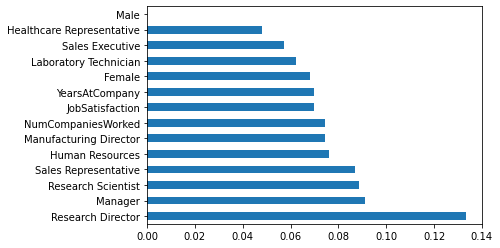

In [58]:
feat_importances = pd.Series(model_xgb.feature_importances_, index=X_enc.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [59]:
X_enc

,JobSatisfaction,YearsAtCompany,NumCompaniesWorked,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Female,Male
0,1.157359,-0.980272,-0.677226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.657940,-0.329582,-1.077952,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.657940,-0.329582,-0.677226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.157359,0.158435,0.124225,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.565590,-0.166910,0.524950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,1.157359,-0.166910,-0.677226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4296,-1.565590,-0.654927,0.124225,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4297,1.157359,-0.654927,-0.276501,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4298,0.249709,-0.492255,-1.077952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [60]:
explainer = shap.TreeExplainer(model_xgb)

In [61]:
shap_values = explainer.shap_values(X_enc)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


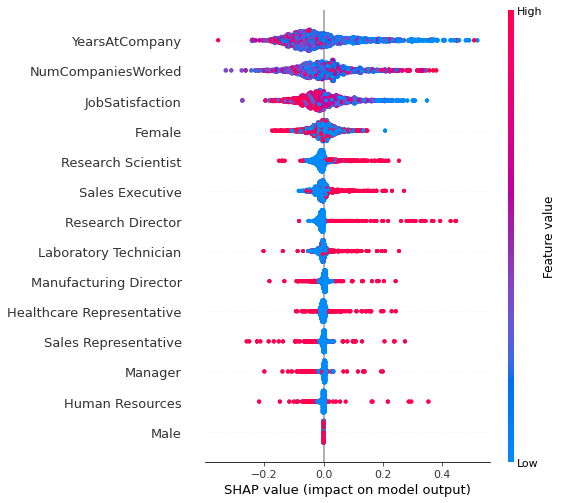

In [62]:
shap.summary_plot(shap_values, X_enc)

In [63]:
model_xgb.save_model('model_xgb.json')

In [64]:
pickle.dump(scaler, open('scaler.pkl','wb'))

In [65]:
pickle.dump(ohe_X, open('ohe.pkl','wb'))

In [66]:
X.to_json('X.json')
selected_df.to_json('selected_df.json')

In [67]:
pickle.dump(model_xgb, open('model.pkl','wb'))

In [68]:
pickle.dump(shap_values, open('shap_values.pkl','wb'))

In [69]:
pickle.dump(model_xgb, open('model_xgb.pkl','wb'))